In [2]:
# Imports
import pandas as pd
from selenium import webdriver
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
import time

globalTab = []

page_url = "https://en.wikipedia.org/wiki/Epidemiology_of_HIV/AIDS" 
service = ChromeService(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.get(page_url)
time.sleep(5)

all = driver.find_element(By.XPATH, '//table[@class="wikitable"]')

rows = []
count = 0
for element in all.find_elements(By.XPATH, './/td'):
    
    element_text = element.text.strip()
    rows.append(element_text)
    if count % 4 == 3:
        globalTab.append(rows)
        rows = []
    count+=1
# print(globalTab)
for i in range(len(globalTab)):
    for j in range(len(globalTab[i])):
        if globalTab[i][j].isdigit():
            globalTab[i][j] = int(globalTab[i][j].replace(' ', ''))
        elif globalTab[i][j].replace(' ', '').isdigit():
            globalTab[i][j] = int(globalTab[i][j].replace(' ', ''))
df = pd.DataFrame(globalTab, columns=["year", "deaths_due_globally", "infection_incidence_rate", "infection_prevalence_rate"])
df['year'] = df['year'].replace('2021[39]', '2021')
df.to_excel("deaths.xlsx", index = False)
df.to_csv("deaths.csv", index = False)
driver.close()


# mydf = scrapping()

year                         int64
deaths_due_globally          int64
infection_incidence_rate     int64
infection_prevalence_rate    int64
dtype: object


Text(0.5, 1.0, 'World')

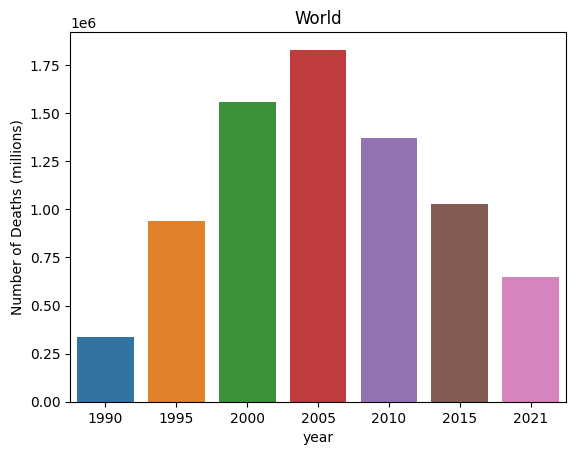

In [4]:
import numpy as np
import seaborn as sns
deaths_df = pd.read_csv("./deaths.csv")
# print(deaths_df.dtypes)

g = sns.barplot(data=deaths_df, x="year", y="deaths_due_globally")
g.set_ylabel("Number of Deaths (millions)")
g.set_title("World")



In [6]:
# Imports
import pandas as pd
from selenium import webdriver
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
import time


globalTab = []
page_url = "https://fr.wikipedia.org/wiki/Épidémiologie_du_sida" 
service = ChromeService(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.get(page_url)
time.sleep(5)
count = 0
all = driver.find_element(By.XPATH, '//table[@class="wikitable sortable jquery-tablesorter"]')

rows = []
# /html/body/div[2]/div/div[3]/main/div[3]/div[3]/div[1]/table[1]/tbody/tr[1]/td[2]
for element in all.find_elements(By.XPATH, './/td'):
    rows.append(element.text)
    if count % 5 == 4:
        globalTab.append(rows)
        rows = []
    count += 1

print(globalTab)
df = pd.DataFrame(globalTab, columns=["id","1990-1999", "2000-2009", "2010-2019", "Total cumulé des décès"])
# df.to_excel("deaths_all_continents.xlsx", index=False)
df.to_csv("deaths_all_continents.csv", index=False)



# mydf = scrapping()

[['Monde', '7 710 000', '15 300 000', '8 810 000', '31 820 000'], ['Afrique subsaharienne', '5 840 000', '11 590 000', '5 830 000', '23 260 000'], ['Afrique du Nord et Moyen-Orient', '15 000', '67 000', '128 000', '210 000'], ['Amérique du Nord et du Sud', '816 000', '751 000', '559 000', '2 126 000'], ['Europe et ex-URSS', '200 000', '294 000', '374 000', '868 000'], ['Asie-Pacifique', '127 000', '576 000', '514 000', '1 217 000'], ['Indo-Asie / Asie du Sud-Est', '642 000', '2 030 000', '1 400 000', '4 072 000']]


In [5]:
import seaborn as sns
deaths_df = pd.read_csv("./deaths_all_continents.csv")
df_Monde = deaths_df[deaths_df["id"] == "Monde"] 
df_Monde

# g = sns.barplot(data=deaths_df, x="id", y="Total cumulé des décès")
# g.set_title("Monde")


,id,1990-1999,2000-2009,2010-2019,Total cumulé des décès
0,Monde,7 710 000,15 300 000,8 810 000,31 820 000


                                 1990-1999   2000-2009  2010-2019  \
id                                                                  
Monde                            7 710 000  15 300 000  8 810 000   
Afrique subsaharienne            5 840 000  11 590 000  5 830 000   
Afrique du Nord et Moyen-Orient     15 000      67 000    128 000   
Amérique du Nord et du Sud         816 000     751 000    559 000   
Europe et ex-URSS                  200 000     294 000    374 000   
Asie-Pacifique                     127 000     576 000    514 000   
Indo-Asie / Asie du Sud-Est        642 000   2 030 000  1 400 000   

                                Total cumulé des décès  
id                                                      
Monde                                       31 820 000  
Afrique subsaharienne                       23 260 000  
Afrique du Nord et Moyen-Orient                210 000  
Amérique du Nord et du Sud                   2 126 000  
Europe et ex-URSS                   

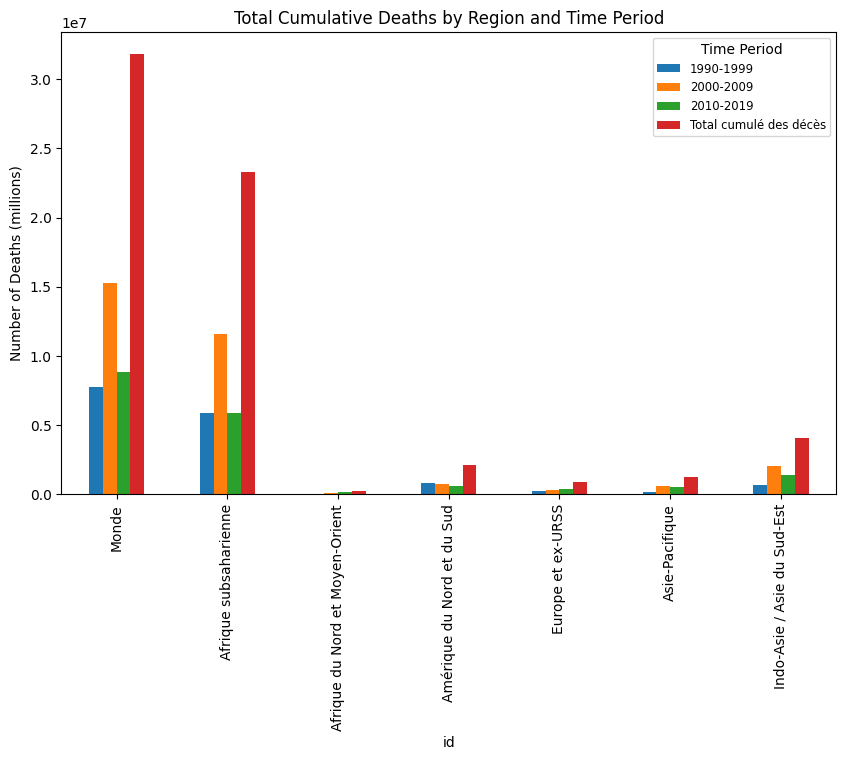

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("deaths_all_continents.csv", index_col="id")
print(df)

df = df.replace('\s+', '', regex=True).astype(int)

# Plot bar chart
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_title("Total Cumulative Deaths by Region and Time Period")
ax.set_ylabel("Number of Deaths (millions)")
ax.legend(title="Time Period", fontsize='small')

# Show plot
plt.show()

In [7]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mapclassify import Quantiles
import mapclassify

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
